# Aggregating benchmark runs

In [36]:
import pathlib
import typing

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from labm8 import pbutil
from labm8 import viz
from labm8 import labdate
from labm8 import labtypes

from datasets.benchmarks.gpgpu import gpgpu_pb2

In [11]:
LOGDIR = pathlib.Path('/tmp/phd/datasets/benchmarks/gpgpu')
assert LOGDIR.is_dir()
!echo $(ls {LOGDIR} | wc -l) files

In [10]:
logs = [pbutil.FromFile(log, gpgpu_pb2.GpgpuBenchmarkRun())
        for log in LOGDIR.iterdir()]
print('loaded', len(logs), 'logs')

In [15]:
num_successful = sum(1 if log.returncode == 0 else 0 for log in logs)
print(f'{num_successful} of {len(logs)} ({num_successful/len(logs):.1%}) benchmark runs succeeded')

70 of 137 (51.1%) benchmark runs succeeded


In [30]:
def KernelInvocationToRow(log: gpgpu_pb2.GpgpuBenchmarkRun, ki: gpgpu_pb2.OpenClKernelInvocation):
    return {
        'date': labdate.DatetimeFromMillisecondsTimestamp(log.ms_since_unix_epoch),
        'suite': log.benchmark_suite,
        'benchmark': log.benchmark_name,
        'dataset': log.dataset_name,
        'device_type': log.device_type,
        'kernel': ki.kernel_name,
        'global_size': ki.global_size,
        'local_size': ki.local_size,
        'runtime_ms': ki.runtime_ms,
        'transferred_bytes': ki.transferred_bytes,
    }

def LogsToTable(logs: typing.Iterator[gpgpu_pb2.GpgpuBenchmarkRun]):
    rows = []
    for log in logs:
        rows += [KernelInvocationToRow(log, ki) for ki in log.kernel_invocation]
    return pd.DataFrame(rows, columns=[
        'date',
        'suite',
        'benchmark',
        'dataset',
        'device_type',
        'kernel',
        'global_size',
        'local_size',
        'runtime_ms',
        'transferred_bytes',
    ])

df = LogsToTable(logs)
df

,date,suite,benchmark,dataset,device_type,kernel,global_size,local_size,runtime_ms,transferred_bytes
0,2019-02-09 11:42:50.065,amd-app-sdk-3.0,MatrixMultiplication,default,cpu,mmmKernel,256,64,0.339917,49152
1,2019-02-09 12:05:04.498,shoc-1.1.5,Scan,default,cpu,reduce,16384,256,1.543184,4194560
2,2019-02-09 11:45:14.924,npb-3.3,ep.A,A,cpu,embar,4096,64,1976.888103,6144
3,2019-02-09 12:02:30.987,rodinia-3.1,hotspot,default,cpu,hotspot,473344,256,10.586597,3145728
4,2019-02-09 11:55:29.643,parboil-0.2,spmv.large,default,cpu,A,146880,192,28.066957,30901580
5,2019-02-09 11:55:29.643,parboil-0.2,spmv.large,default,cpu,A,146880,192,27.812718,30901580
6,2019-02-09 11:55:29.643,parboil-0.2,spmv.large,default,cpu,A,146880,192,27.795191,30901580
7,2019-02-09 11:55:29.643,parboil-0.2,spmv.large,default,cpu,A,146880,192,27.879362,30901580
8,2019-02-09 11:55:29.643,parboil-0.2,spmv.large,default,cpu,A,146880,192,27.777776,30901580
9,2019-02-09 11:55:29.643,parboil-0.2,spmv.large,default,cpu,A,146880,192,27.851357,30901580


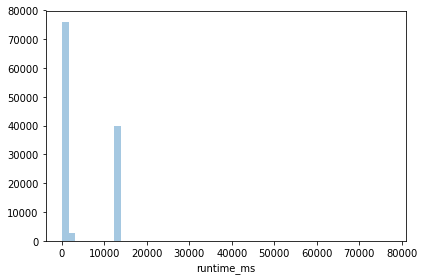

In [37]:
sns.distplot(df.runtime_ms, kde=False)
viz.finalise()

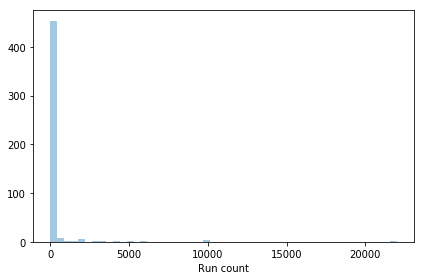

In [52]:
num_runs = df.groupby(['suite', 'benchmark', 'kernel', 'dataset']).count()['runtime_ms']
sns.distplot(num_runs, kde=False)
plt.xlabel('Run count')
viz.finalise()

In [70]:
# Sanity check that features are the same across runs.
# TODO(cec): Do we care about global and local sizes being consistent?

def ColumnIsConstantAcrossRuns(df, col):
    mins = df.groupby(['suite', 'benchmark', 'kernel', 'dataset', 'global_size', 'local_size']).min()[col]
    maxs = df.groupby(['suite', 'benchmark', 'kernel', 'dataset', 'global_size', 'local_size']).max()[col]
    return (mins == maxs).mean() == 1

assert ColumnIsConstantAcrossRuns(df, 'transferred_bytes')

In [73]:
# Averages (only the runtime_ms field is averaged, everything else is constant)
df.groupby(['suite', 'benchmark', 'kernel', 'dataset', 'device_type', 'global_size', 'local_size']).mean()

runtime_ms  \
suite           benchmark            kernel                          dataset device_type global_size local_size                
amd-app-sdk-3.0 AdvancedConvolution  advancedNonSeparableConvolution default cpu         262144      256            3.681417   
                                     advancedSeparableConvolution    default cpu         262144      256            1.894864   
                BinomialOption       binomial_options                default cpu         16320       255            2.246400   
                BitonicSort          bitonicSort                     default cpu         16384       256            0.148547   
                BlackScholes         blackScholes                    default cpu         65536       256            1.823547   
                FastWalshTransform   fastWalshTransform              default cpu         512         256            0.098310   
                FloydWarshall        floydWarshallPass               default cpu         65536       256            0.329717   
                Histogram            histogram256_vector             default cpu         8192        128            3.629794   
                MatrixMultiplication mmmKernel                       default cpu         256         64             0.339917   
                MatrixTranspose      matrixTranspose                 default cpu         256         256            0.343379   
                MonteCarloAsian      calPriceVega_Vector             default cpu         131072      64            40.450942   
                PrefixSum            group_prefixSum                 default cpu         4096        4096           0.623554   
                Reduction            reduce                          default cpu         256         256            0.261261   
                ScanLargeArrays      ScanLargeArrays                 default cpu         16384       128            0.534771   
                                     blockAddition                   default cpu         32768       256            0.269417   
                                     prefixSum                       default cpu         64          64             0.198890   
                SimpleConvolution    simpleNonSeparableConvolution   default cpu         262144      256            2.302954   
                                     simpleSeparableConvolutionPass1 default cpu         263168      256            1.506363   
                                     simpleSeparableConvolutionPass2 default cpu         262144      256            1.430750   
                SobelFilter          sobel_filter                    default cpu         262144      256            1.366851   
npb-3.3         bt.A                 compute_rhs1                    A       cpu         262144      64             1.302935   
                                     compute_rhs2                    A       cpu         262144      64             1.136526   
                                     exact_rhs1                      A       cpu         262144      64             1.112195   
                                     exact_rhs2                      A       cpu         3844        62             5.497293   
                                     exact_rhs3                      A       cpu         3844        62             4.569237   
                                     exact_rhs4                      A       cpu         3844        62             4.419905   
                                     exact_rhs5                      A       cpu         238328      62             0.636253   
                                     initialize1                     A       cpu         4096        64             1.353213   
                                     initialize2                     A       cpu         262144      64            11.819015   
                                     initialize3                     A       cpu         4096        64             0.347306   
...               